# Edinburgh Cycle Hire in the pandemic

Imported packages

In [1]:
import os
import sys
import numpy as np
import math 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import matplotlib as mpl

Read the csv files and store it in dataFrames

In [2]:
jan19 = pd.read_csv(os.path.join(os.getcwd(),'datasets','jan19.csv'))
jan20 = pd.read_csv(os.path.join(os.getcwd(),'datasets','jan20.csv'))

feb19 = pd.read_csv(os.path.join(os.getcwd(),'datasets','feb19.csv'))
feb20 = pd.read_csv(os.path.join(os.getcwd(),'datasets','feb20.csv'))

mar19 = pd.read_csv(os.path.join(os.getcwd(),'datasets','mar19.csv'))
mar20 = pd.read_csv(os.path.join(os.getcwd(),'datasets','mar20.csv'))

apr19 = pd.read_csv(os.path.join(os.getcwd(),'datasets','apr19.csv'))
apr20 = pd.read_csv(os.path.join(os.getcwd(),'datasets','apr20.csv'))

may19 = pd.read_csv(os.path.join(os.getcwd(),'datasets','may19.csv'))
may20 = pd.read_csv(os.path.join(os.getcwd(),'datasets','may20.csv'))

jun19 = pd.read_csv(os.path.join(os.getcwd(),'datasets','jun19.csv'))
jun20 = pd.read_csv(os.path.join(os.getcwd(),'datasets','jun20.csv'))

july19 = pd.read_csv(os.path.join(os.getcwd(),'datasets','july19.csv'))
july20 = pd.read_csv(os.path.join(os.getcwd(),'datasets','july20.csv'))

aug19 = pd.read_csv(os.path.join(os.getcwd(),'datasets','aug19.csv'))
aug20 = pd.read_csv(os.path.join(os.getcwd(),'datasets','aug20.csv'))

sep19 = pd.read_csv(os.path.join(os.getcwd(),'datasets','sep19.csv'))
sep20 = pd.read_csv(os.path.join(os.getcwd(),'datasets','sep20.csv'))

oct19 = pd.read_csv(os.path.join(os.getcwd(),'datasets','oct19.csv'))
oct20 = pd.read_csv(os.path.join(os.getcwd(),'datasets','oct20.csv'))

nov19 = pd.read_csv(os.path.join(os.getcwd(),'datasets','nov19.csv'))
nov20 = pd.read_csv(os.path.join(os.getcwd(),'datasets','nov20.csv'))

dec19 = pd.read_csv(os.path.join(os.getcwd(),'datasets','dec19.csv'))
dec20 = pd.read_csv(os.path.join(os.getcwd(),'datasets','dec20.csv'))

A preview of what the dataFrame looks like

In [3]:
mar19.head()

,started_at,ended_at,duration,start_station_id,start_station_name,start_station_description,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_description,end_station_latitude,end_station_longitude
0,2019-03-01 00:00:56.509000+00:00,2019-03-01 00:07:02.422000+00:00,365,248,Bristo Square,"Bristo Square, near Potterrow",55.946004,-3.188665,359,Causewayside,Causewayside outside NLS,55.936430,-3.180115
1,2019-03-01 00:49:21.473000+00:00,2019-03-01 01:00:31.274000+00:00,669,275,Riego Street,Riego Street on junction with East Fountainbridge,55.945160,-3.203678,346,Morningside Road,Corner of Morningside Road & Morningside Park ...,55.927986,-3.209739
2,2019-03-01 02:23:00.079000+00:00,2019-03-01 02:39:03.720000+00:00,963,275,Riego Street,Riego Street on junction with East Fountainbridge,55.945160,-3.203678,346,Morningside Road,Corner of Morningside Road & Morningside Park ...,55.927986,-3.209739
3,2019-03-01 02:46:45.400000+00:00,2019-03-01 02:55:09.366000+00:00,503,289,Castle Street,Near Rose Street,55.951501,-3.203184,183,Waverley Bridge,near the top of the South ramp,55.951344,-3.191421
4,2019-03-01 02:53:22.246000+00:00,2019-03-01 03:11:54.557000+00:00,1112,260,Lauriston Place,near Chalmers Street,55.944772,-3.197266,366,Newhaven Road / Dudley Gardens,Corner of Dudley Gardens on Newhaven Road,55.975921,-3.191346


Clean the data: We are considering rows that have duration greater than 250 seconds.

In [4]:
jan19 = jan19[jan19.duration>250]
jan20 = jan20[jan20.duration>250]

feb19 = feb19[feb19.duration>250]
feb20 = feb20[feb20.duration>250]

mar19 = mar19[mar19.duration>250]
mar20 = mar20[mar20.duration>250]

apr19 = apr19[apr19.duration>250]
apr20 = apr20[apr20.duration>250]

may19 = may19[may19.duration>250]
may20 = may20[may20.duration>250]

jun19 = jun19[jun19.duration>250]
jun20 = jun20[jun20.duration>250]

july19 = july19[july19.duration>250]
july20 = july20[july20.duration>250]

aug19 = aug19[aug19.duration>250]
aug20 = aug20[aug20.duration>250]

sep19 = sep19[sep19.duration>250]
sep20 = sep20[sep20.duration>250]

oct19 = oct19[oct19.duration>250]
oct20 = oct20[oct20.duration>250]

nov19 = oct19[oct19.duration>250]
nov20 = oct20[oct20.duration>250]

dec19 = oct19[oct19.duration>250]
dec20 = oct20[oct20.duration>250]

The number of cycles used per month:

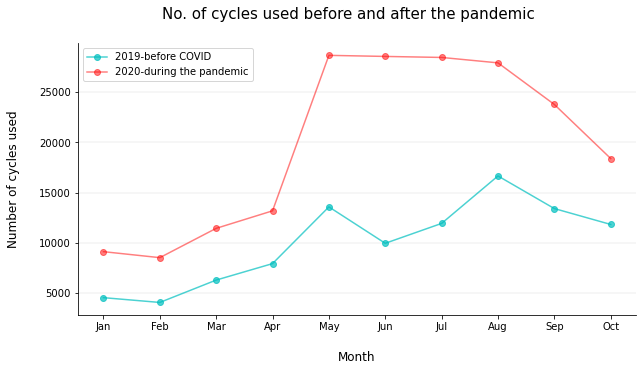

In [5]:
beforeCOVID = [len(jan19), len(feb19),len(mar19),len(apr19),len(may19),len(jun19),len(july19),len(aug19),len(sep19),len(oct19)]
afterCOVID = [len(jan20), len(feb20),len(mar20),len(apr20),len(may20),len(jun20),len(july20),len(aug20),len(sep20),len(oct20)]
months = ['Jan','Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct']

fig, ax = plt.subplots(1,1, figsize=(10,5))
fig.suptitle('No. of cycles used before and after the pandemic', fontsize=15)

ax.plot(months, beforeCOVID, 'co-', alpha=0.7)
ax.plot(months, afterCOVID, 'ro-', alpha=0.5)
ax.set_ylabel('Number of cycles used\n', fontsize=12)
ax.set_xlabel('\nMonth', fontsize=12)

ax.grid(color = 'k', linestyle='-', linewidth=0.07, axis = 'y')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.legend(['2019-before COVID','2020-during the pandemic'])

plt.show()

But an issue! Being in edinburgh, we know that cycle stations are being made every other month. We can assume that the number of stations used per month is almost the same as the number of stations that exist.

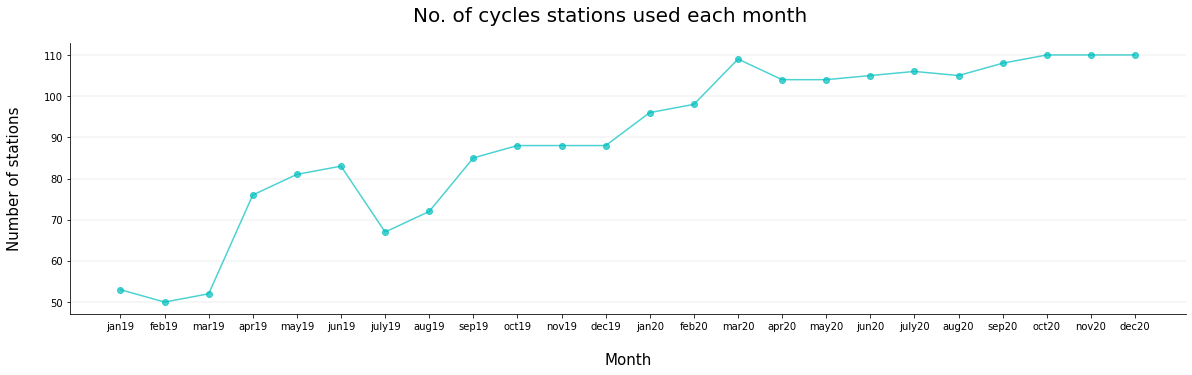

In [6]:
def stations(x):
    return len(list(set(list(x.start_station_id) + list(x.end_station_id))))

no_of_stations = [stations(jan19), stations(feb19), stations(mar19), stations(apr19), stations(may19), stations(jun19),
                 stations(july19), stations(aug19), stations(sep19), stations(oct19), stations(nov19), stations(dec19),
                 stations(jan20), stations(feb20), stations(mar20), stations(apr20), stations(may20), stations(jun20),
                 stations(july20), stations(aug20), stations(sep20), stations(oct20), stations(nov20), stations(dec20)]
months = ['jan19', 'feb19', 'mar19', 'apr19', 'may19', 'jun19', 'july19', 'aug19', 'sep19', 'oct19', 'nov19', 'dec19',
         'jan20', 'feb20', 'mar20', 'apr20', 'may20', 'jun20', 'july20', 'aug20', 'sep20', 'oct20', 'nov20', 'dec20']

fig, ax = plt.subplots(1,1, figsize=(20,5))
fig.suptitle('No. of cycles stations used each month', fontsize=20)

ax.plot(months, no_of_stations, 'co-', alpha=0.7)
ax.set_ylabel('Number of stations\n', fontsize=15)
ax.set_xlabel('\nMonth', fontsize=15)

ax.grid(color = 'k', linestyle='-', linewidth=0.07, axis = 'y')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

We can see that the number of stations used is increasing every month. We can observe 2 things, 1 : In the year 2019, we can see that the number of stations used by people is exeptionally high in april, may and june. This can either be because people just want to go out more to enjoy the change in seasons or can be because new stations were being installed. The drop in the number of stations is drastic (idk the reason behind the drop). 2 : Ignoring the irregular bumps like the one mentioned in 1, we can see that there is a steady rise in the number of stations used per month. A valid reason for this would be that new stations are being installed every other month. 

Keeping the fact that new stations are being installed every other month, its not fair for us to just see that number of cycles used per month. Instead it would be fair if we compared the average number of cycles used per cycle station.

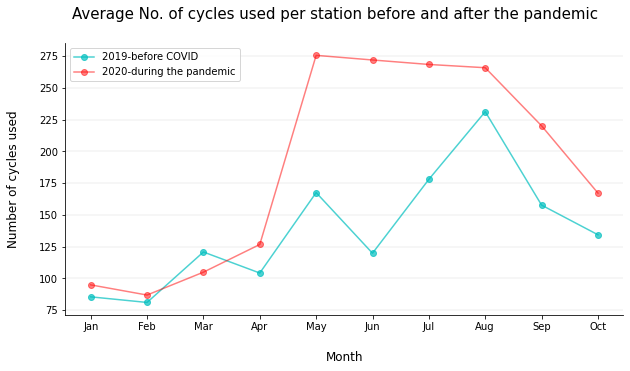

In [7]:
def avg_per_station(x):
    return len(x)/len(list(set(list(x.start_station_id) + list(x.end_station_id))))

beforeCOVID = [avg_per_station(jan19), avg_per_station(feb19), avg_per_station(mar19), avg_per_station(apr19), 
               avg_per_station(may19), avg_per_station(jun19), avg_per_station(july19), avg_per_station(aug19),
               avg_per_station(sep19), avg_per_station(oct19)]
afterCOVID = [avg_per_station(jan20), avg_per_station(feb20), avg_per_station(mar20), avg_per_station(apr20),
              avg_per_station(may20), avg_per_station(jun20), avg_per_station(july20), avg_per_station(aug20),
              avg_per_station(sep20), avg_per_station(oct20)]
months = ['Jan','Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct']

fig, ax = plt.subplots(1,1, figsize=(10,5))
fig.suptitle('Average No. of cycles used per station before and after the pandemic', fontsize=15)

ax.plot(months, beforeCOVID, 'co-', alpha=0.7)
ax.plot(months, afterCOVID, 'ro-', alpha=0.5)
ax.set_ylabel('Number of cycles used\n', fontsize=12)
ax.set_xlabel('\nMonth', fontsize=12)

ax.grid(color = 'k', linestyle='-', linewidth=0.07, axis = 'y')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.legend(['2019-before COVID','2020-during the pandemic'])

plt.show()

We can see that the average number of cycles used per station seems to be almost the same in January, February, March and April (before the lockdown) but during the lockdown, it seems like using shared cycles wasnt really a big issue for the people. Since all bars, restaurants and other indoor public spots were closed, people spent more time going to outdoor places to meet friends and family. It was nice for people who didnt own cycles to cycle during the lockdown period.

In [8]:
may20['date'] = may20['started_at'].str[0:10]

may20['exercise'] = may20['start_station_id'] == may20['end_station_id']

may20.groupby('exercise').count()['started_at']

exercise
False    21161
True      7504
Name: started_at, dtype: int64

- Q1. Pandemic vs Non-Pandemic : 2019 vs 2020 (mar, jun, oct)
- Q2. winter vs summer : July vs feb (2019)
- Q3. most visited places during summer : july, august (2019)

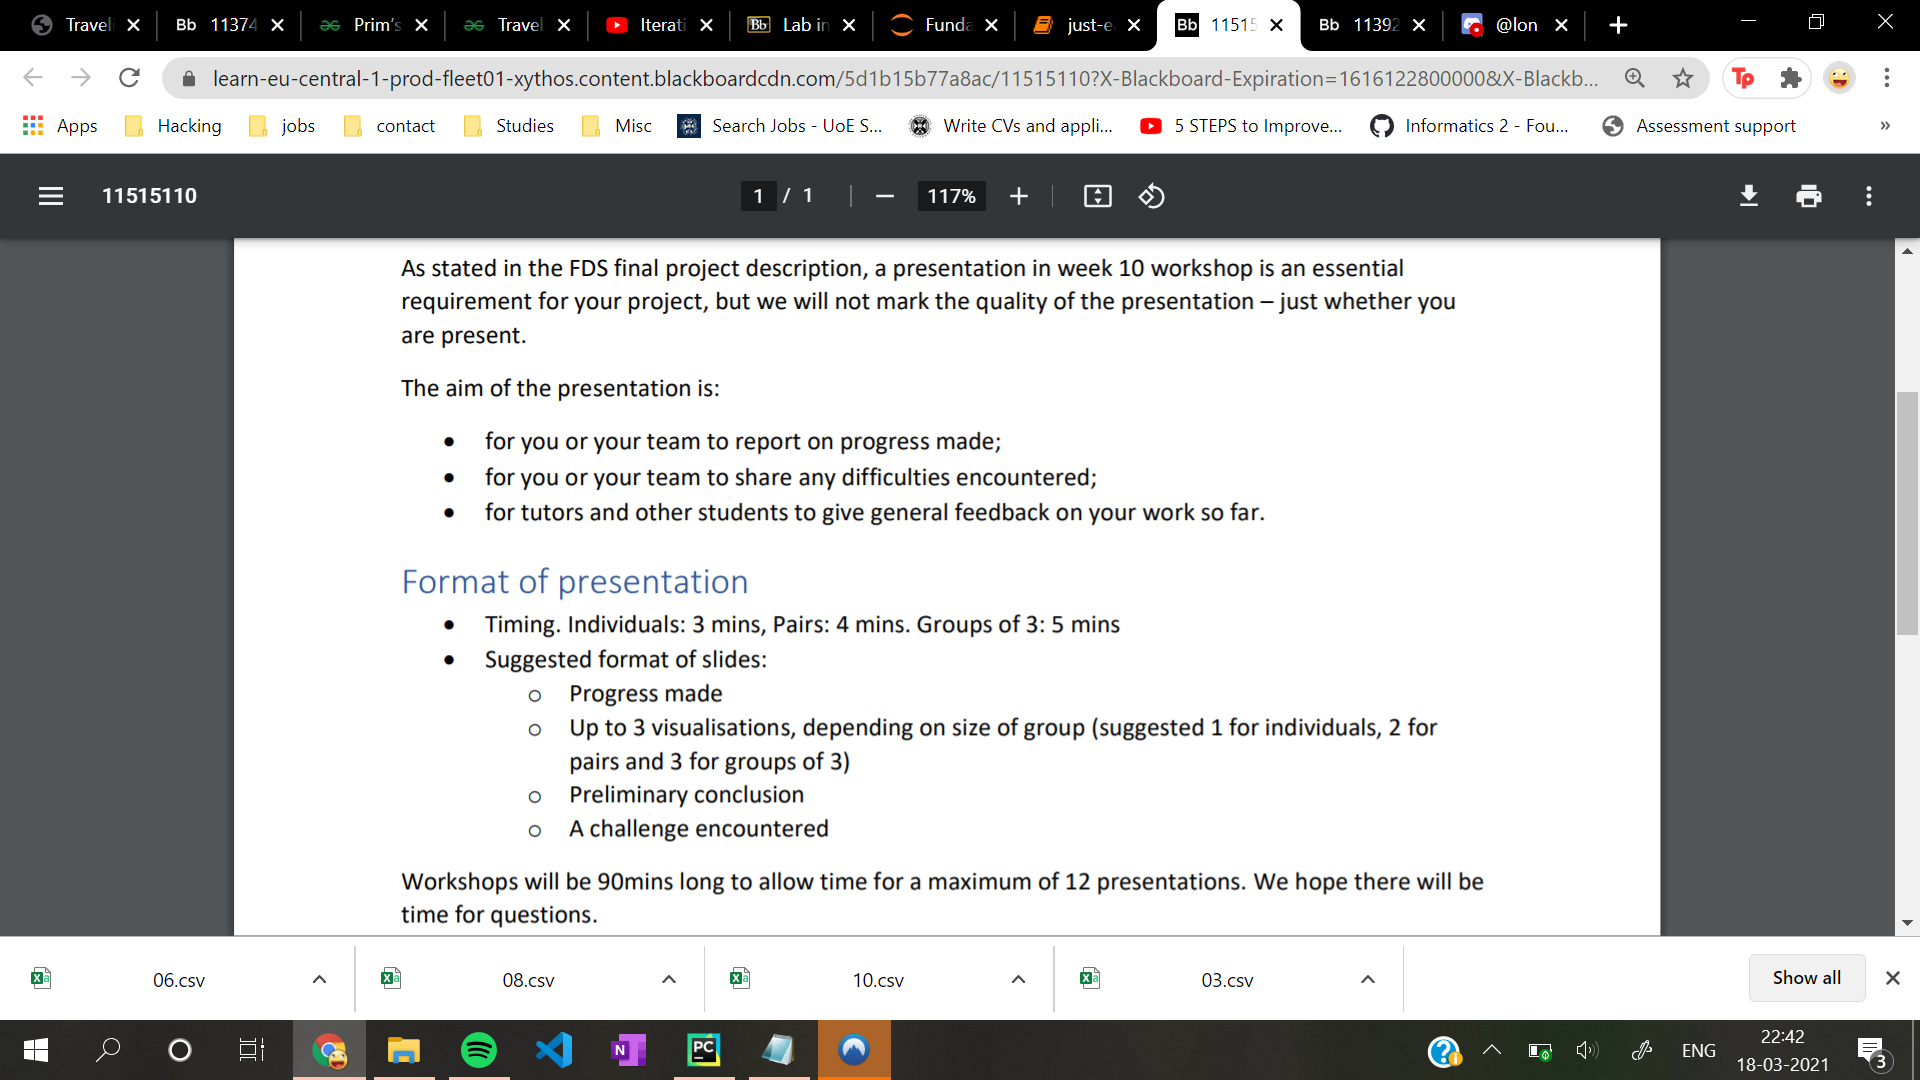

The presentation reflects the fact that in many real-world situations, work is collaborative. We are keen
for you to share general ideas via slides and visualisations